In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
cab=pd.read_csv(url, parse_dates=True)
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
print(cab.shape)
cab.info()

(359392, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [5]:
url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
city=pd.read_csv(url)
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
city['City'].value_counts()

NEW YORK NY         1
CHICAGO IL          1
NASHVILLE TN        1
WASHINGTON DC       1
PITTSBURGH PA       1
SACRAMENTO CA       1
SAN FRANCISCO CA    1
TUCSON AZ           1
SEATTLE WA          1
AUSTIN TX           1
DENVER CO           1
ATLANTA GA          1
DALLAS TX           1
PHOENIX AZ          1
SAN DIEGO CA        1
ORANGE COUNTY       1
SILICON VALLEY      1
MIAMI FL            1
LOS ANGELES CA      1
BOSTON MA           1
Name: City, dtype: int64

In [7]:
#import customer data
url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
customer=pd.read_csv(url)
print(customer.shape)
customer.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
#import transaction data
url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'
trans=pd.read_csv(url)
trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
print(trans.shape)
trans.info()

(440098, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### Merge the different data sets

#### Merge Cab with transaction data

In [10]:
cab_trans=cab.merge(trans, on='Transaction ID', how='left')
cab_trans.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


#### Merge Cab with customer data

In [11]:
df=cab_trans.merge(customer, on='Customer ID', how='left')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


#### Merge cab with city data

In [12]:
df=df.merge(city, on='City', how='left')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


## Data Engineering

#### Profit from the rides

In [13]:
### Profit from the rides
df['profit']=df['Price Charged']-df['Cost of Trip']
df.sample()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit
103602,10126859,42727,Yellow Cab,NEW YORK NY,17.34,418.52,216.4032,931,Card,Female,24,4905,"8,405,837","302,149",202.1168


In [14]:
# profit per Km
df['profit/km']=df['profit']/df['KM Travelled']

#### Change Date of Travel to datetime

In [15]:
from datetime import datetime
df['Date of Travel'] = df['Date of Travel'].map(lambda date : datetime.fromordinal(datetime(1900,1,1).toordinal() + date))

In [16]:
df.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/km
302642,10371845,2018-09-11,Yellow Cab,BOSTON MA,42.18,578.46,556.7760,57194,Card,Male,23,26278,"248,968","80,021",21.6840,0.514083
222866,10272635,2017-12-11,Yellow Cab,NEW YORK NY,35.97,967.35,513.6516,1277,Card,Female,43,14220,"8,405,837","302,149",453.6984,12.613244
95167,10116857,2016-12-09,Pink Cab,SAN DIEGO CA,10.17,136.51,107.8020,19526,Card,Female,48,24002,"959,307","69,995",28.7080,2.822812
314327,10385887,2018-10-09,Yellow Cab,BOSTON MA,21.42,329.80,287.8848,57873,Card,Male,48,13556,"248,968","80,021",41.9152,1.956825
55546,10069743,2016-08-29,Pink Cab,LOS ANGELES CA,33.60,522.50,396.4800,8421,Card,Male,61,7618,"1,595,037","144,132",126.0200,3.750595


In [17]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),profit,profit/km
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198,6.083579
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840,5.543493
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000,-4.998235
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000,2.000385
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000,4.466809
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000,9.170006
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000,41.115556


In [18]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
profit                0
profit/km             0
dtype: int64

In [19]:
df.shape

(359392, 16)

### Extract day of week and month

In [20]:
#Extract day of week
df['day_of_week'] = df['Date of Travel'].dt.day_name()

In [21]:
#Extract month from Date of Travel
df['month'] = df['Date of Travel'].dt.month_name()
#Extract year from Date of Travel
df['year'] = pd.DatetimeIndex(df['Date of Travel']).year
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/km,day_of_week,month,year
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,1.882266,Sunday,January,2016
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,0.826904,Friday,January,2016
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,3.049558,Monday,January,2016
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,0.777751,Saturday,January,2016
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,1.929439,Tuesday,January,2016


In [22]:
#remove commas from users column
i=['Population', 'Users']
for columns in i:
    df[columns]=df[columns].str.replace(",", "", regex=False).astype(int)

df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/km,day_of_week,month,year
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,1.882266,Sunday,January,2016
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,0.826904,Friday,January,2016
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,3.049558,Monday,January,2016
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,0.777751,Saturday,January,2016
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844,1.929439,Tuesday,January,2016


### Stastistical Summary

In [31]:
print(df.shape)
df.info()

(359392, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int32         
 13  Users           

In [32]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
profit                0
profit/km             0
day_of_week           0
month                 0
year                  0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [36]:
df.to_csv('Master_data.csv', index=False)

## Exploratory data analysis

#### Distribution of KM Travelled

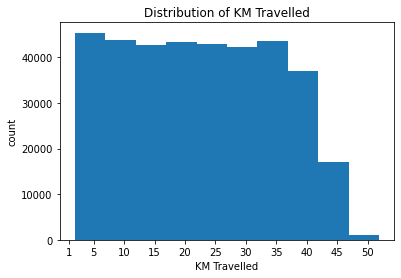

In [23]:
ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['{}'.format(v) for v in ticks]

bins_edges=np.arange(df['KM Travelled'].min(), df['KM Travelled'].max()+5, 5)
plt.hist(data=df, x='KM Travelled', bins=bins_edges)
plt.title('Distribution of KM Travelled')
plt.ylabel('count')
plt.xlabel('KM Travelled')

# Apply x-ticks
plt.xticks(ticks, labels);

There is an even distribution of KM Travelled from 1km to 35km and starts dropping when the distance gets longer.

#### Distribution of Profit

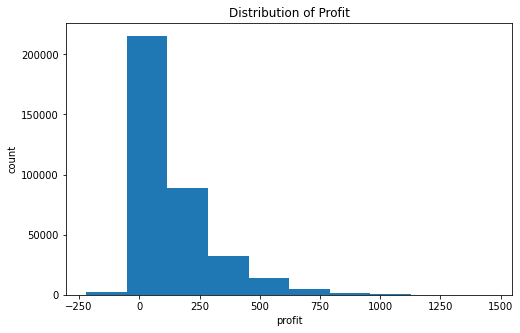

In [24]:
plt.figure(figsize=[8, 5])

plt.hist(data=df, x='profit')
plt.title('Distribution of Profit')
plt.ylabel('count')
plt.xlabel('profit');
#plt.xscale('log')
           
#plt.xlim(15, 1500)

some cab rides resulted into a loss but generally profit distribution is skewed to the righ

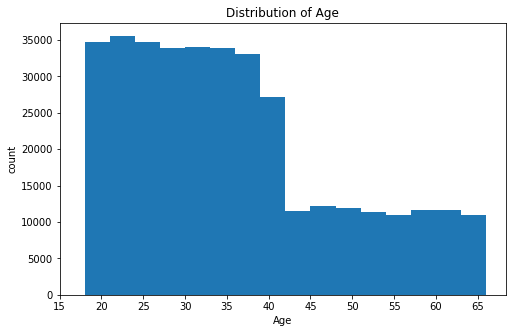

In [25]:
ticks = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
bins_edges=np.arange(df['Age'].min(), df['Age'].max()+3, 3)
plt.hist(data=df, x='Age', bins=bins_edges)
plt.title('Distribution of Age')
plt.ylabel('count')
plt.xlabel('Age')

# Apply x-ticks
plt.xticks(ticks, labels);

Most cab riders are aged between 15-40 years.

### Income (USD/Month)

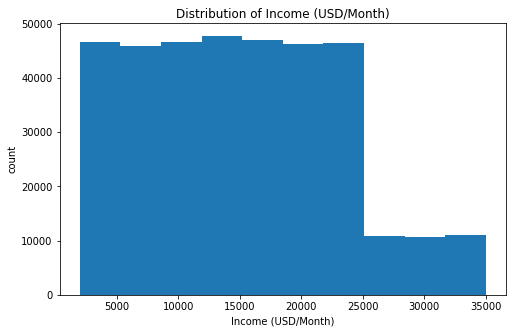

In [26]:
plt.figure(figsize=[8, 5])

plt.hist(data=df, x='Income (USD/Month)')
plt.title('Distribution of Income (USD/Month)')
plt.ylabel('count')
plt.xlabel('Income (USD/Month)');

Income for most riders lies between $2000 to $25000

#### Distibution of Company rides

In [27]:
#Pie chart funtion
def pie_chart(x):
    i= df[x].value_counts()
    plt.pie(i, labels = i.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
    plt.axis('square')
    plt.show()

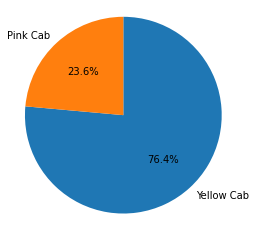

In [28]:
# base_color=sns.color_palette()[0]
# plt.subplot(1, 2, 1)
# sns.countplot(data=cab, x='Company', color=base_color, )
# plt.title('Number of trips per company')

company = df['Company'].value_counts()
plt.pie(company, labels = company.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.axis('square')
plt.show();

Yellow cab makes 76.4% of trips while Pink cab is 23.6%

In [29]:
#function for count plot
def count_plot(x):
    #plt.figure(figsize=[8, 5])
    sns.countplot(x=x, data=df, order = df[x].value_counts().index, hue='Company')

SyntaxError: keyword argument repeated: order (2463676049.py, line 12)

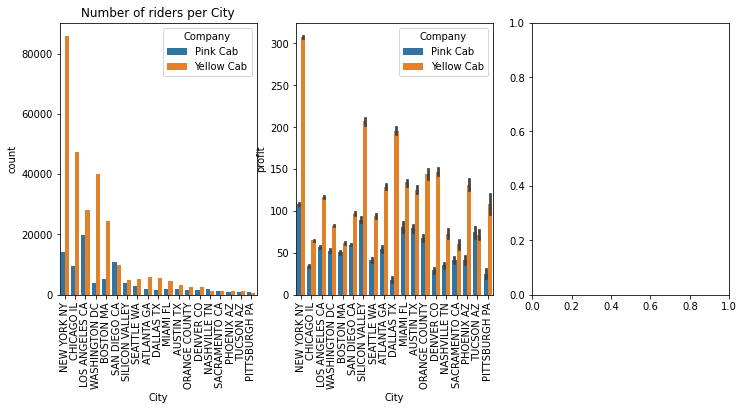

In [30]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 3, 1)
count_plot('City')
plt.xticks(rotation=90)
plt.title('Number of riders per City')

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='City', y='profit', hue='Company', order = df['City'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(data=df, y='profit/km', x='City', hue='Company', order = df['City'].value_counts().index,
           order=df.sort_values('profit/km',ascending = False).City)
plt.xticks(rotation=90);

The Yellow Cab is prefered in most cities except in San Diego, Nashville and Pittsburgh

In [ ]:
pie_chart('Payment_Mode');

Most riders prefer the use of card for as a payment mode

In [ ]:
pie_chart('Gender');

Males make up for most of the riders at 57.3%

In [ ]:
count_plot('day_of_week')
plt.xticks(rotation=90)
plt.title('Count of Rides per Day');


In [ ]:
count_plot('month')
plt.xticks(rotation=90)
plt.title('Count of Rides per month');

December has most rides, this can be attributed to the holidays

## Bivariate Analysis

### Relationship between KM travelled and profit

In [ ]:
#plot a scatter plot
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
sns.regplot(data=df, x='KM Travelled', y='profit', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)

plt.subplot(1, 2, 2)
plt.hist2d(data=df, x='KM Travelled', y='profit', cmin=0.5, cmap='viridis_r')
plt.xlabel('Age')
plt.ylabel('Duration(minutes)')
plt.colorbar() ;

In [ ]:
sns.lmplot(x='KM Travelled', y='profit', hue='Company', data=df, fit_reg=False, legend=False)

In [ ]:
plt.figure(figsize=(8, 5))
#sns.regplot(data=df, x='Age', y='Income (USD/Month)', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.hist2d(data=df, x='Age', y='Income (USD/Month)', cmin=0.5, cmap='viridis_r')
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.colorbar();

### Bivariate Exploration of categorical variables

In [ ]:
def box_plot(x_axis, y_axis):
    sns.boxplot(x=x_axis, y=y_axis, data=df, hue='Company')

In [ ]:
box_plot('Gender', 'profit')

In [ ]:
box_plot('Payment_Mode', 'profit')

In [ ]:
box_plot('Gender', 'Age')

In [ ]:
box_plot('Gender', 'Income (USD/Month)')

In [ ]:
df.sample()

### Multivariate Analysis

In [ ]:
#Create a function for facetGrid
def g(x):
    g = sns.FacetGrid(data = df, hue = x, size = 5)
    g.map(plt.scatter, x='Age', 'profit')
    plt.legend(loc='upper right');


In [ ]:
def fg(x):
    g = sns.FacetGrid(data = df, col = x, size = 5, margin_titles = True)
    g.map(plt.scatter, 'Age', 'Income (USD/Month)', alpha=0.25)

In [ ]:
fg('Company')

In [ ]:
def fg(x):
    g = sns.FacetGrid(data = df, col = x, size = 5, margin_titles = True)
    g.map(plt.scatter, 'profit', 'Income (USD/Month)', alpha=0.25)

In [ ]:
fg('Company')